In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *

# Wczytywanie Danych!

In [56]:
%store -r df1
df = df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date>gold_price  60 non-null     object
dtypes: object(1)
memory usage: 608.0+ bytes


In [57]:
df.head()

,date>gold_price
0,2011-01-01>1360.475
1,2011-02-01>1371.313
2,2011-03-01>1422.848
3,2011-04-01>1474.431
4,2011-05-01>1512.188


# Data Cleaning!

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date>gold_price  60 non-null     object
dtypes: object(1)
memory usage: 608.0+ bytes


In [59]:
df = df["date>gold_price"].str.split('>', expand=True)

In [60]:
df.head()

,0,1
0,2011-01-01,1360.475
1,2011-02-01,1371.313
2,2011-03-01,1422.848
3,2011-04-01,1474.431
4,2011-05-01,1512.188


In [61]:
df.columns = ["Date","Price"]

In [62]:
df[["Year","Month","Day"]] = df["Date"].str.split("-",expand=True)
df = df.drop(columns=["Date"])

In [63]:
df = df.drop(columns=["Day"])
df = df[["Year","Month","Price"]]
df.head()


,Year,Month,Price
0,2011,01,1360.475
1,2011,02,1371.313
2,2011,03,1422.848
3,2011,04,1474.431
4,2011,05,1512.188


In [64]:
df.dtypes # Trzeba zmienić typy danych

Year     object
Month    object
Price    object
dtype: object

In [65]:
df = df.astype({"Year": int, "Month": int,"Price": float})
df.dtypes

Year       int64
Month      int64
Price    float64
dtype: object

# Informacje

## Podstawowe informacje

In [66]:
df.describe()

,Year,Month,Price
count,60.000000,60.000000,60.000000
mean,2013.000000,6.500000,1415.159850
std,1.426148,3.481184,213.574159
min,2011.000000,1.000000,1068.317000
25%,2012.000000,3.750000,1238.772500
50%,2013.000000,6.500000,1346.756000
75%,2014.000000,9.250000,1626.933500
max,2015.000000,12.000000,1780.648000


## Zwracamy największą wartość w zwiorze wartości

In [67]:
# Max
df[df["Price"] == df["Price"].max()]
maxPrice = float(df[df["Price"] == df["Price"].max()]["Price"])
print(df[df["Price"] == df["Price"].max()],"--->" ,maxPrice)

   Year  Month     Price
8  2011      9  1780.648 ---> 1780.648


## Zwracamy najmniejszą wartość w zwiorze wartości

In [68]:
# Min
df[df["Price"] == df["Price"].min()]
minPrice = float(df[df["Price"] == df["Price"].min()]["Price"])
print(df[df["Price"] == df["Price"].min()],"--->" ,minPrice)

    Year  Month     Price
59  2015     12  1068.317 ---> 1068.317


## Różnica między największą wartością a najmniejszą wartością

In [69]:
# Rozstęp
rozstep = maxPrice - minPrice
print(rozstep)

712.3309999999999


## Ilość wartości

In [70]:
n = len(df)
n

60

## Pierwiastek z ilości wartości

In [71]:
k = sqrt(n)
k

7.745966692414834

## Szerokość, czyli zaokrąglona wartość rozstępu przez k

In [72]:
szerokosc = round(rozstep/k)
szerokosc

92

## Grupowanie wartości

### Tworzymy dwie listy: "początek", "koniec"
### początek to [minPrice, minPrice + szerokość, minPrice + 2*szerokość, minPrice 3*szerokość,...] 
### koniec to [poczatek[0] + szerokość, poczatek[1] + szerokość, poczatek[2] + szerokość, poczatek[3] + szerokość,...] 


In [73]:
# Początek
# Koniec

początek = [minPrice]
koniec = []
a = minPrice
i = 0
while i <8:
    a += szerokosc
    koniec.append(a)
    początek.append(a)
    i+=1
początek.pop()
print("Początek: ", początek, "oraz Koniec: " , koniec)


Początek:  [1068.317, 1160.317, 1252.317, 1344.317, 1436.317, 1528.317, 1620.317, 1712.317] oraz Koniec:  [1160.317, 1252.317, 1344.317, 1436.317, 1528.317, 1620.317, 1712.317, 1804.317]


## Liczymy ile wartości z zbioru wartości jest mniejszych niż dana wartość z listy "koniec" 

In [74]:
# n_i cum
pierwszy_element = len(df[df["Price"] < 1160.317])

n_i_cum = [pierwszy_element]
i = 0
b = 1160.317
liczba_elementów = 0
while i < len(koniec):
    b += szerokosc
    liczba_elementów = len(df[df["Price"] < b])
    n_i_cum.append(liczba_elementów)
    i +=1
    if len(n_i_cum) >= 9:
        n_i_cum.pop()
print(n_i_cum)

[6, 18, 29, 35, 38, 44, 53, 60]


## Ile cen mieści się w przedziale od n_i_cum[i-1] do n_i_cum[i]

### Różnica miedzy ilością cen w n_i_cum[i] od n_i_cum[i-1]

In [75]:
# n_i
pierwszy_element = n_i_cum[0]  # element zerowy (pierwszy w liscie n_i_cum) nie możemy odjąć od poprzedniego, wieć przepisujemy wartość n_i_cum[0]
n_i = [pierwszy_element]
element = 0
i = 1
while i < len(n_i_cum):
    element = n_i_cum[(i)] - n_i_cum[i-1]
    n_i.append(element)
    i+=1
    if len(n_i) >= 9:
        n_i.pop()
print(n_i)

[6, 12, 11, 6, 3, 6, 9, 7]


In [76]:
g7 = pd.DataFrame({
    "Początek":początek,
    "Koniec":koniec,
    "n_i cum":n_i_cum,
    "n_i":n_i
})
g7

,Początek,Koniec,n_i cum,n_i
0,1068.317,1160.317,6,6
1,1160.317,1252.317,18,12
2,1252.317,1344.317,29,11
3,1344.317,1436.317,35,6
4,1436.317,1528.317,38,3
5,1528.317,1620.317,44,6
6,1620.317,1712.317,53,9
7,1712.317,1804.317,60,7


Stored 'g7' (DataFrame)
Stored 'początek' (list)


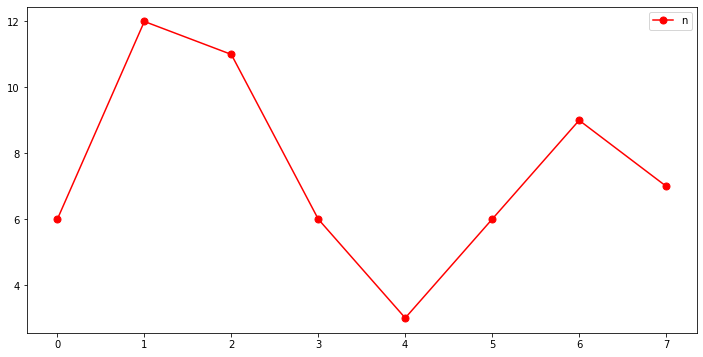

In [135]:
x = np.arange(0,7)
xlabel = [0]
for element in początek:
    xlabel.append(element)
plt.figure(figsize=(12,6))

plt.plot(g7["n_i"],color="red",marker="o",markersize=7)
plt.legend("n_i")

%store g7 początek


# Dalsze Obliczenia

## Środek 
### (początek[i]+koniec[i])/2

In [136]:
# środek
pierwszy_element = (początek[0]+koniec[0])/2
srodek = []
i = 0
element = 0
while i < len(koniec):
    element = (początek[i]+koniec[i])/2
    srodek.append(element)
    i +=1

print(srodek)


[1114.317, 1206.317, 1298.317, 1390.317, 1482.317, 1574.317, 1666.317, 1758.317]


In [137]:
# srodek*n_i
pierwszy_element = srodek[0]*n_i[0]
srodek_n_i = []
i = 0 
while i < len(srodek):
    srodek_n_i.append(srodek[i] * n_i[i])
    i+=1

print(srodek_n_i)


[6685.902, 14475.804, 14281.487000000001, 8341.902, 4446.951, 9445.902, 14996.853, 12308.219000000001]


In [138]:
# srodek - srednia
srodek_srednia = []
i = 0 
while i < len(srodek):
    srodek_srednia.append(srodek[i]-df["Price"].mean())
    i+=1

print(srodek_srednia)

[-300.84285000000045, -208.84285000000045, -116.84285000000045, -24.842850000000453, 67.15714999999955, 159.15714999999955, 251.15714999999955, 343.15714999999955]


In [139]:
# poprzednie^2
poprzednie_2 = []
i = 0 
while i < len(srodek_srednia):
    poprzednie_2.append(srodek_srednia[i]**2)
    i+=1

print(poprzednie_2)

[90506.42039612278, 43615.33599612269, 13652.251596122605, 617.1671961225226, 4510.0827961224395, 25330.998396122355, 63079.913996122275, 117756.82959612219]


In [140]:
# poprzednie*n_i
poprzednie_n_i = []
i = 0 
while i < len(poprzednie_2):
    poprzednie_n_i.append(poprzednie_2[i] * n_i[i])
    i+=1

print(poprzednie_n_i)

[543038.5223767366, 523384.0319534723, 150174.76755734865, 3703.0031767351356, 13530.24838836732, 151985.99037673412, 567719.2259651005, 824297.8071728554]


In [141]:
# srodek*n_i cum
srodek_n_i_cum = [srodek_n_i[0]]

i = 1
while i < len(srodek_n_i):
    srodek_n_i_cum.append(srodek_n_i_cum[i-1] + srodek_n_i[1])
    i+=1

print(srodek_n_i_cum)

[6685.902, 21161.706, 35637.509999999995, 50113.314, 64589.118, 79064.922, 93540.72600000001, 108016.53000000001]


In [142]:
g6 = pd.DataFrame({
    "Początek":początek,
    "Koniec":koniec,
    "n_i cum":n_i_cum,
    "n_i":n_i,
    "Srodek":srodek,
    "Srodek*n_i":srodek_n_i,
    "srodek-srednia":srodek_srednia,
    "poprzednie ^2":poprzednie_2,
    "poprzednie_n_i":poprzednie_n_i,
    "srodek*n_i_cum":srodek_n_i_cum
})
g6

,Początek,Koniec,n_i cum,n_i,Srodek,Srodek*n_i,srodek-srednia,poprzednie ^2,poprzednie_n_i,srodek*n_i_cum
0,1068.317,1160.317,6,6,1114.317,6685.902,-300.84285,90506.420396,543038.522377,6685.902
1,1160.317,1252.317,18,12,1206.317,14475.804,-208.84285,43615.335996,523384.031953,21161.706
2,1252.317,1344.317,29,11,1298.317,14281.487,-116.84285,13652.251596,150174.767557,35637.510
3,1344.317,1436.317,35,6,1390.317,8341.902,-24.84285,617.167196,3703.003177,50113.314
4,1436.317,1528.317,38,3,1482.317,4446.951,67.15715,4510.082796,13530.248388,64589.118
5,1528.317,1620.317,44,6,1574.317,9445.902,159.15715,25330.998396,151985.990377,79064.922
6,1620.317,1712.317,53,9,1666.317,14996.853,251.15715,63079.913996,567719.225965,93540.726
7,1712.317,1804.317,60,7,1758.317,12308.219,343.15715,117756.829596,824297.807173,108016.530


# STATYSTYKA

In [143]:
import statistics as st

## Średnia

In [144]:
srednia = df["Price"].mean()
srednia

1415.1598500000005

## Kwartyle

### Kwartyle dzielą wszystkie obserowowane dane na równe dane co do ilości obserwacji grupy

## Kwartyl pierwszy Q1  dzieli dane w stosunku 25% do 75%
### 25% danych jest niższa bądź równa wartości Q1, a 75% powyżej bądź równa Q1

In [145]:
# Kwartyl 1

kwartyl1 = np.percentile(df["Price"], 25) #Q1
kwartyl1

1238.7725

## Kwartyl drugi/Mediana dzieli dane w stosunku 50% do 50%
### 50% danych jest niższa bądź równa wartości Q2, a 50% powyżej bądź równa Q2


In [146]:
# Mediana

mediana = np.percentile(df["Price"], 50) #Mediana
mediana

1346.7559999999999

## Kwartyl pierwszy Q3 dzieli dane w stosunku 75% do 25%
### 75% danych jest niższa bądź równa wartości Q3, a 25% powyżej bądź równa Q3

In [147]:
# Kwartyl 3

kwartyl3 = np.percentile(df["Price"], 75) #Q1
kwartyl3

1626.9335

## Dominanta opisuje wartość najczęściej występującą w zbiorze

In [148]:
# Dominanta
dominanta = 0

if df["Price"].nunique() == len(df.index):
    dominanta = None

# Nie ma dominanty!

## Wariancja opisuje jak duże jest zróżnicowanie wyników w danym zbiorze 

In [149]:
# Wariacja

wariacja = np.var(df["Price"])
wariacja


44853.6895741275

## Odchylenie standardowe opisuje czy rozrzut wyników wokół średniej jest niewielki czy wielki.

In [150]:
# Odchylenie standardowe

odchylenie_standardowe = st.stdev(df["Price"])
odchylenie_standardowe

213.5741594875364

## Rozstęp międzykwartylowy opisuje różnice między Q3 a Q1

In [151]:
# Rozstęp miedzykwartylowy

rozstęp_miedzykwartylowy = kwartyl3-kwartyl1
rozstęp_miedzykwartylowy

388.16100000000006

## Rozstęp ćwiartkowy opisuje połowe wartości rozstępu miedzykwartylowego

In [152]:
# Rozstęp ćwiartkowe

odchylenie_cwiartkowe = rozstęp_miedzykwartylowy/2
odchylenie_cwiartkowe

194.08050000000003

## Współczynnik zmienności opisuje zmienność wyników, obserwacji w odniesieniu do wielkości średniej. 

In [153]:
# Klasyczny współczynnik zmienności 

klasyczny_współczynnik_zmienności = (odchylenie_standardowe*100)/srednia
klasyczny_współczynnik_zmienności


15.091875273845307

In [154]:
# Pozycyjny współczynnik zmienności

pozycyjny_współczynnik_zmienności = (odchylenie_cwiartkowe*100)/mediana
pozycyjny_współczynnik_zmienności

14.410962342102062

In [155]:
# Współczynniki skośności klasyczny

współczynniki_skośności_klasyczny = 3 * ((srednia - mediana)/odchylenie_standardowe)
współczynniki_skośności_klasyczny

0.9608444696324668

In [156]:
# Kurtoza 
from scipy.stats import kurtosis

kurtoza = kurtosis(df["Price"], fisher=True)
kurtoza


-1.3468333022727883

In [157]:
# Eksces

eksces = kurtoza - 3
eksces

-4.346833302272788

# Współczynnik konceentraji Giniego

  1. Współczynnik Giniego przyjmuje wartości [0; 1]

  2. Wartość zerowa mówi o równomierności rozkładu

  3. Wzrost wartości mówi o wzroscie nierówności rozkładu,

  4. Wartość spółczynnika Giniego przyjąłby wartość 1, gdy tylko jedna obserwacja uzyskała dodatnią wartość zmiennej

In [158]:
# Współczynnik konceentraji Giniego

def gini(dane):
    sorted_list = sorted(dane)

    wzrost, sfera = 0, 0

    for value in sorted_list:

        wzrost += value
        sfera += wzrost - value / 2.
        
    fair_area = wzrost * len(dane) / 2.
    return (fair_area - sfera) / fair_area

wspolczynnik_giniego = gini(df["Price"])
wspolczynnik_giniego

0.08536405877478152

In [159]:
statystyka = pd.Series(
    [kwartyl1,mediana,kwartyl3,dominanta,wariacja,odchylenie_standardowe,rozstęp_miedzykwartylowy,odchylenie_cwiartkowe,klasyczny_współczynnik_zmienności,pozycyjny_współczynnik_zmienności,współczynniki_skośności_klasyczny,kurtoza,eksces,wspolczynnik_giniego],
    index=["Kwartyl 1","Mediana","Kwartyl 3","Dominanta","Wariacja","Odchylenie standardowe","Rozstęp miedzykwartylowy","Odchylenie cwiartkowe","Klasyczny współczynnik zmienności","Pozycyjny współczynnik zmienności","Współczynniki skośności klasyczny","Kurtoza","Eksces","Współczynnik Giniego"]
)
statystyka

Kwartyl 1                             1238.772500
Mediana                               1346.756000
Kwartyl 3                             1626.933500
Dominanta                                     NaN
Wariacja                             44853.689574
Odchylenie standardowe                 213.574159
Rozstęp miedzykwartylowy               388.161000
Odchylenie cwiartkowe                  194.080500
Klasyczny współczynnik zmienności       15.091875
Pozycyjny współczynnik zmienności       14.410962
Współczynniki skośności klasyczny        0.960844
Kurtoza                                 -1.346833
Eksces                                  -4.346833
Współczynnik Giniego                     0.085364
dtype: float64